# QUESTION

Use
the diabetes dataset in Sklearn to build a linear regression model to predict
the progression of diabetes. Evaluate the performance of the model using mean
squared error and R-squared.

## IMPORT MODULE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

## IMPORT DATA

In [2]:
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [4]:
new_columns = ['age', 'sex', 'bodyMassIndex', 'avgBP', 'SerumTest1','SerumTest2', 'SerumTest3', 'SerumTest4', 'SerumTest5', 'SerumTest6', 'Target']
df.columns = new_columns

In [5]:
df.head(5)

,age,sex,bodyMassIndex,avgBP,SerumTest1,SerumTest2,SerumTest3,SerumTest4,SerumTest5,SerumTest6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## DATA INFORMATION

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            442 non-null    float64
 1   sex            442 non-null    float64
 2   bodyMassIndex  442 non-null    float64
 3   avgBP          442 non-null    float64
 4   SerumTest1     442 non-null    float64
 5   SerumTest2     442 non-null    float64
 6   SerumTest3     442 non-null    float64
 7   SerumTest4     442 non-null    float64
 8   SerumTest5     442 non-null    float64
 9   SerumTest6     442 non-null    float64
 10  Target         442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [7]:
df.describe()

,age,sex,bodyMassIndex,avgBP,SerumTest1,SerumTest2,SerumTest3,SerumTest4,SerumTest5,SerumTest6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


## DATA CLEANING

In [8]:
df.isnull().sum()

age              0
sex              0
bodyMassIndex    0
avgBP            0
SerumTest1       0
SerumTest2       0
SerumTest3       0
SerumTest4       0
SerumTest5       0
SerumTest6       0
Target           0
dtype: int64

## OUTLIERS

### DETECTING OUTLIERS

<AxesSubplot:>

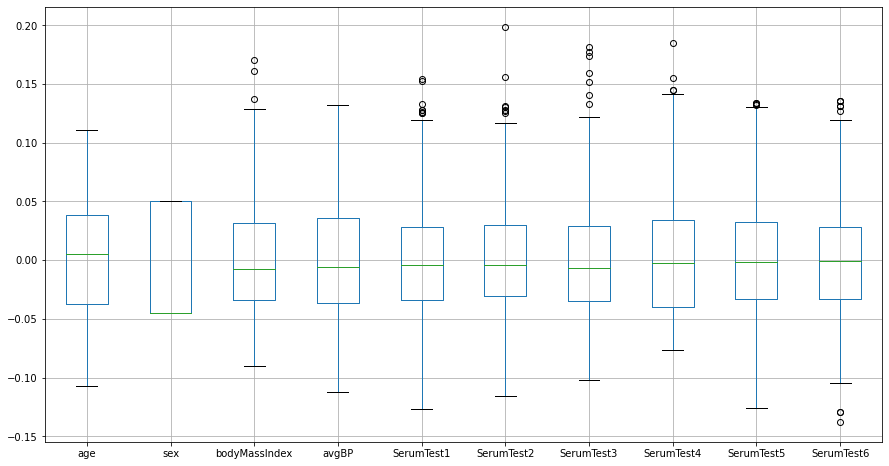

In [9]:
df.boxplot(column = ['age', 'sex', 'bodyMassIndex', 'avgBP', 'SerumTest1','SerumTest2', 'SerumTest3', 'SerumTest4', 'SerumTest5', 'SerumTest6'], figsize = [15,8])

In [10]:
def out_by_iqr(data):
    out = []
    data = np.sort(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lwr_bnd = q1 - (1.5 * iqr)
    upr_bnd = q3 + (1.5 * iqr)
    for i in data:
        if (i < lwr_bnd or i > upr_bnd):
            out.append(i)
    return out    

### HANDLING OUTLIERS

In [11]:
def trim_row(data):
    for i in data.iloc[:, lambda x : [0,2,3,4,5,6,7,8,9]]:
        out = out_by_iqr(data[i])
        row_index = [(data[i])]
        data.drop(data[data[i].isin(out)].index, axis = 0, inplace = True)
    return data

In [12]:
data = trim_row(df)
data

,age,sex,bodyMassIndex,avgBP,SerumTest1,SerumTest2,SerumTest3,SerumTest4,SerumTest5,SerumTest6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
436,-0.056370,-0.044642,-0.074108,-0.050428,-0.024960,-0.047034,0.092820,-0.076395,-0.061177,-0.046641,48.0
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0


<AxesSubplot:>

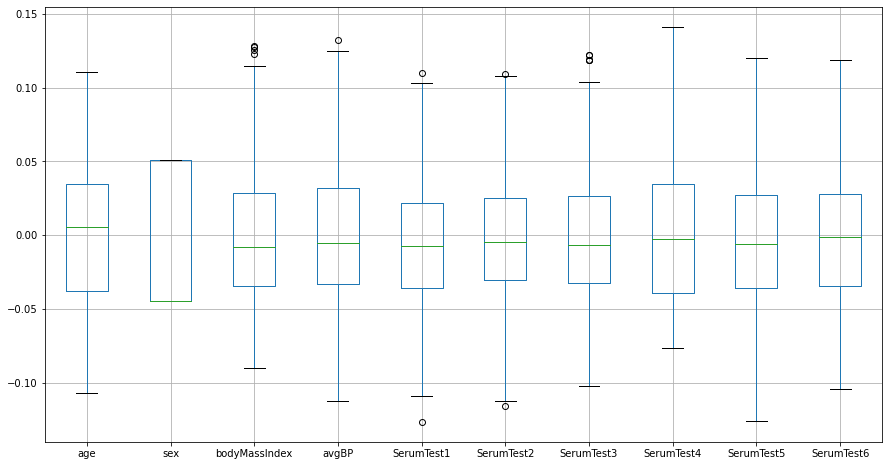

In [13]:
data.boxplot(column = ['age', 'sex', 'bodyMassIndex', 'avgBP', 'SerumTest1','SerumTest2', 'SerumTest3', 'SerumTest4', 'SerumTest5', 'SerumTest6'], figsize = [15,8])

## DETERMING CO-RELATION IN FEATURES 

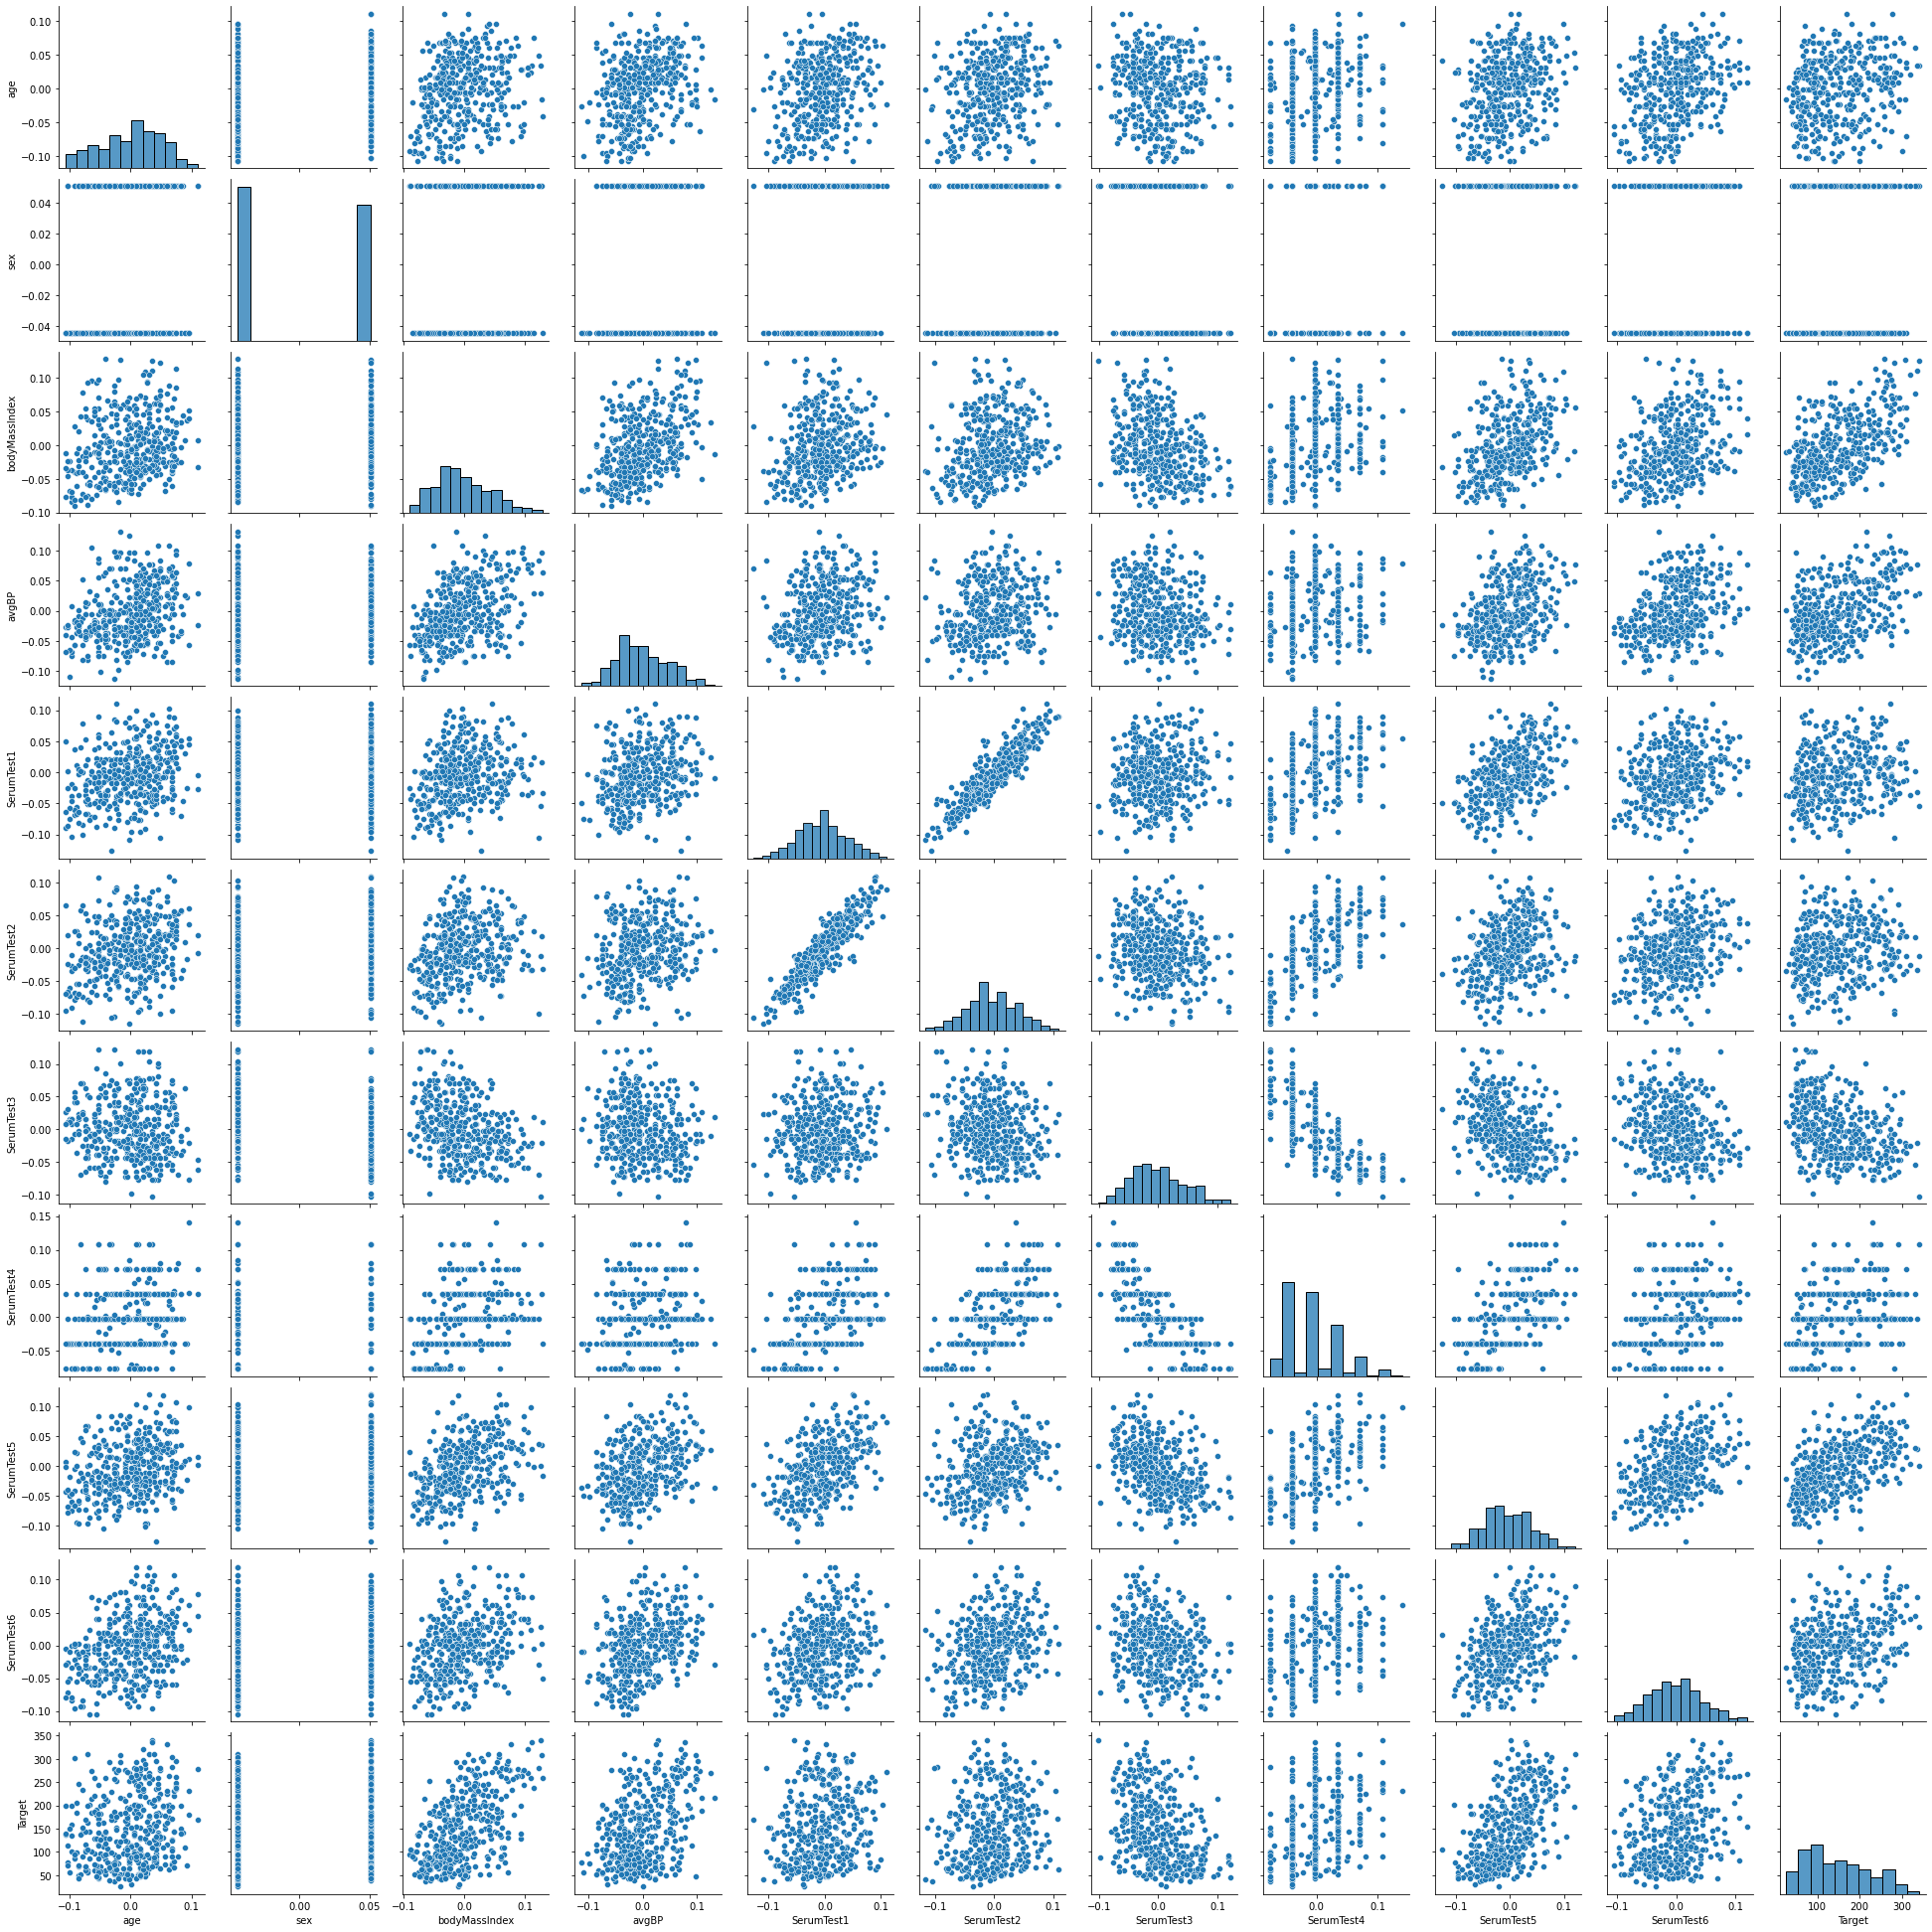

In [14]:
sns.pairplot(data)

In [15]:
data.corr()

,age,sex,bodyMassIndex,avgBP,SerumTest1,SerumTest2,SerumTest3,SerumTest4,SerumTest5,SerumTest6,Target
age,1.000000,0.167742,0.223534,0.328123,0.280296,0.249545,-0.098889,0.234091,0.286598,0.331606,0.196244
sex,0.167742,1.000000,0.050330,0.232874,0.009089,0.120891,-0.385997,0.338739,0.137955,0.176995,0.024371
bodyMassIndex,0.223534,0.050330,1.000000,0.424265,0.235128,0.231289,-0.331752,0.374421,0.442611,0.347859,0.569476
avgBP,0.328123,0.232874,0.424265,1.000000,0.244779,0.193349,-0.160791,0.248303,0.380538,0.375635,0.435305
SerumTest1,0.280296,0.009089,0.235128,0.244779,1.000000,0.905622,0.090740,0.498675,0.477639,0.292884,0.179599
SerumTest2,0.249545,0.120891,0.231289,0.193349,0.905622,1.000000,-0.168771,0.651310,0.303903,0.269775,0.138814
SerumTest3,-0.098889,-0.385997,-0.331752,-0.160791,0.090740,-0.168771,1.000000,-0.749822,-0.394419,-0.231251,-0.367967
SerumTest4,0.234091,0.338739,0.374421,0.248303,0.498675,0.651310,-0.749822,1.000000,0.582542,0.347158,0.387616
SerumTest5,0.286598,0.137955,0.442611,0.380538,0.477639,0.303903,-0.394419,0.582542,1.000000,0.412980,0.551414
SerumTest6,0.331606,0.176995,0.347859,0.375635,0.292884,0.269775,-0.231251,0.347158,0.412980,1.000000,0.334036


## FEATURES SELECTION

<AxesSubplot:>

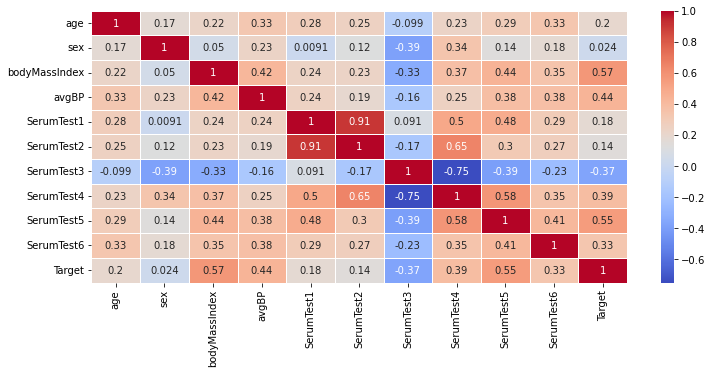

In [16]:
plt.figure(figsize = (12, 5))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', linewidth = 1)

## MODEL TRAINING

In [17]:
X = data[['bodyMassIndex', 'avgBP', 'SerumTest3', 'SerumTest4', 'SerumTest5']]
Y = data['Target']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### FINDING PARAMETERS

In [18]:
lr.intercept_

147.6670598460306

In [19]:
lr.coef_

array([ 552.88564876,  256.88625976, -132.65726473, -137.87778567,
        589.69790082])

In [20]:
X.columns

Index(['bodyMassIndex', 'avgBP', 'SerumTest3', 'SerumTest4', 'SerumTest5'], dtype='object')

In [21]:
pd.DataFrame(lr.coef_, index = X.columns, columns = ['Coefficents'])

,Coefficents
bodyMassIndex,552.885649
avgBP,256.886260
SerumTest3,-132.657265
SerumTest4,-137.877786
SerumTest5,589.697901


## MODEL EVALUATION

### Mathematical formulas

In [22]:
print('MSE : ', np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

MSE :  56.73579055605869


In [23]:
print('R2 score : ', r2_score(y_test, lr.predict(x_test)))

R2 score :  0.4699873773899462


### Plotting Models For Each Feature

Text(0, 0.5, 'Target')

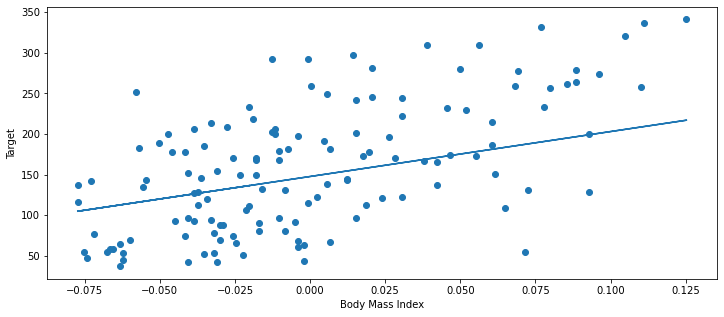

In [33]:
plt.figure(figsize = (12, 5))
plt.scatter(x_test['bodyMassIndex'], y_test)
plt.plot(x_test['bodyMassIndex'], (lr.intercept_ + lr.coef_[0] * x_test['bodyMassIndex']))
plt.xlabel("Body Mass Index")
plt.ylabel("Target")

Text(0, 0.5, 'Target')

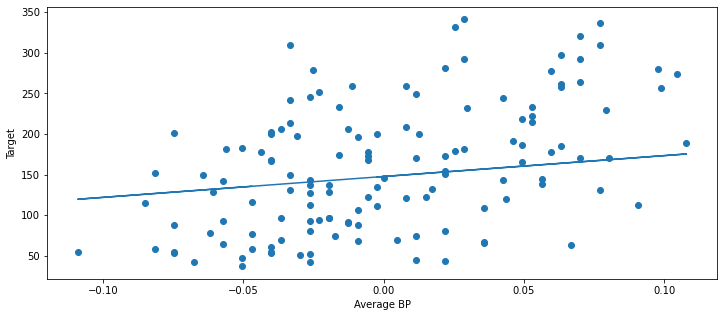

In [25]:
plt.figure(figsize = (12, 5))
plt.scatter(x_test['avgBP'], y_test)
plt.plot(x_test['avgBP'], (lr.intercept_ + lr.coef_[1] * x_test['avgBP']))
plt.xlabel("Average BP")
plt.ylabel("Target")

Text(0, 0.5, 'Target')

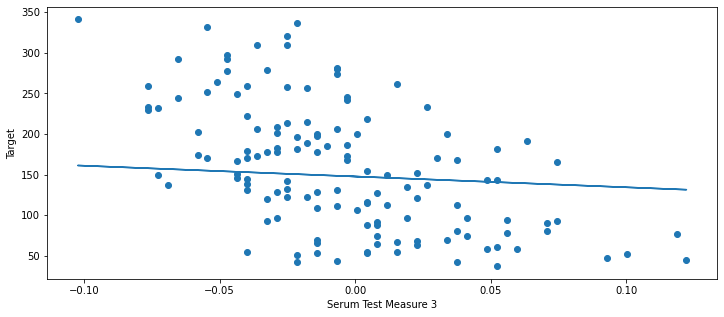

In [26]:
plt.figure(figsize = (12, 5))
plt.scatter(x_test['SerumTest3'], y_test)
plt.plot(x_test['SerumTest3'], (lr.intercept_ + lr.coef_[2] * x_test['SerumTest3']))
plt.xlabel("Serum Test Measure 3")
plt.ylabel("Target")

Text(0, 0.5, 'Target')

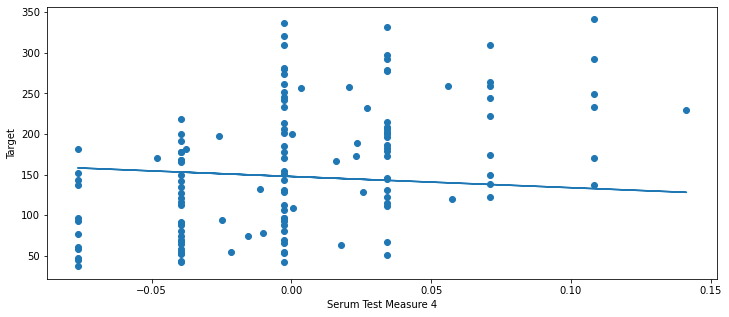

In [27]:
plt.figure(figsize = (12, 5))
plt.scatter(x_test['SerumTest4'], y_test)
plt.plot(x_test['SerumTest4'], (lr.intercept_ + lr.coef_[3] * x_test['SerumTest4']))
plt.xlabel("Serum Test Measure 4")
plt.ylabel("Target")

Text(0, 0.5, 'Target')

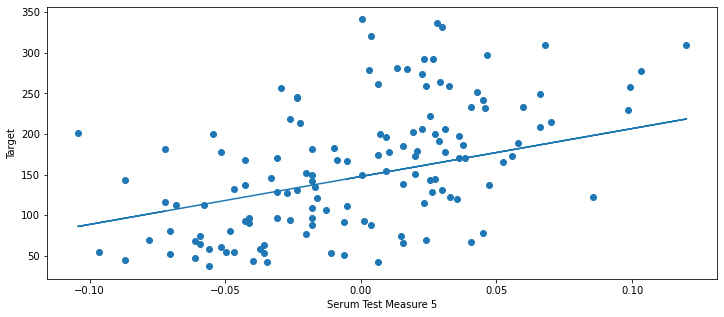

In [28]:
plt.figure(figsize = (12, 5))
plt.scatter(x_test['SerumTest5'], y_test)
plt.plot(x_test['SerumTest5'], (lr.intercept_ + lr.coef_[4] * x_test['SerumTest5']))
plt.xlabel("Serum Test Measure 5")
plt.ylabel("Target")

## PLOTTING ERRORS

Text(0, 0.5, 'Residuals')

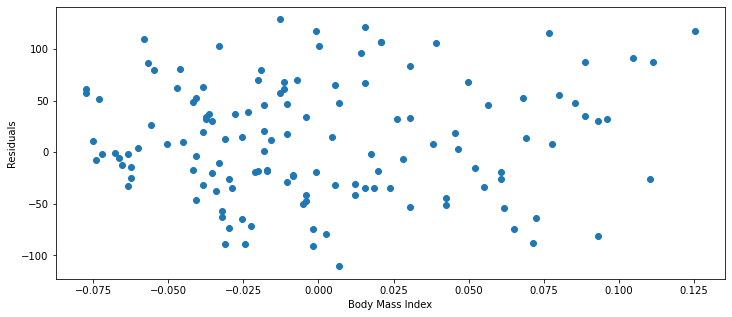

In [29]:
plt.figure(figsize = (12, 5))
residuals = (y_test - lr.predict(x_test))
plt.scatter(x_test['bodyMassIndex'], residuals)
plt.xlabel("Body Mass Index")
plt.ylabel("Residuals")

Text(0, 0.5, 'Residuals')

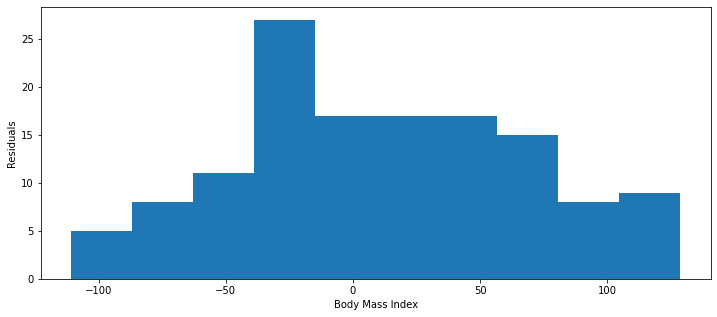

In [30]:
plt.figure(figsize = (12, 5))
plt.hist(residuals)
plt.xlabel("Body Mass Index")
plt.ylabel("Residuals")

Text(0, 0.5, 'Predicted Target')

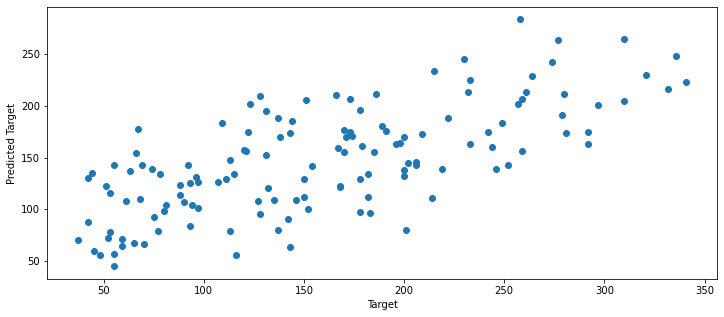

In [31]:
plt.figure(figsize = (12, 5))
predictions = lr.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel("Target")
plt.ylabel("Predicted Target")

C:\Users\Public\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Target', ylabel='Density'>

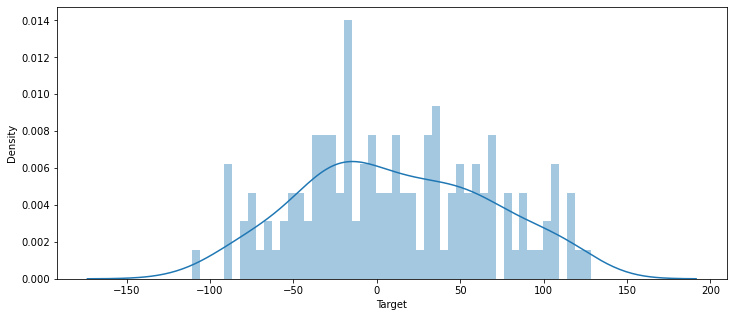

In [32]:
plt.figure(figsize = (12, 5))
sns.distplot((residuals), bins = 50)